In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter

Newton's Law of Gravity: $F = ma = G\frac{Mm}{r^2}$. For a collection of masses in vector calculus terms:

$$\frac{d^2 \overrightarrow{r}_i}{dt^2} = \sum_{j \neq i} \frac{Gm_j}{r^3_{ij}}\overrightarrow{r}_{ij}$$

Where $\overrightarrow{r}_i$ and $m_i$ is the location and mass of the ith particle and $\overrightarrow{r}_{ij} = \overrightarrow{r}_j- \overrightarrow{r}_i$ (or the seperation vector)

Non-Dimensionalize by setting G = 1:



$$\frac{d^2 \overrightarrow{r}'_i}{dt^2} = \sum_{j \neq i} \frac{m_j}{r'^3_{ij}}\overrightarrow{r}'_{ij}$$

Where:
- $\vec{r}_i' = \vec{r}_i / L$ and $\vec{r}_{ij}' = \vec{r}_{ij} / L$ where $L$ is some characteristic length of the problem
- $m_i' = m_i / M$ where $M$ is some characteristic length of the problem
- $t' = t\sqrt{GM/L^3}$ where $M$ and $L$ are the characteristic length and mass.



All following code will drop primes assuming everything is dimensionless. We can solve for dimensionaless time $t'$ and then solve for t using

$$ t = t' \sqrt{L^3 /GM} $$

## 2 Body Problem

Here we will set

- $M$ = mass of earth = $5.97 \times 10^{24} kg$
- $L$ = earth-sun distance = $1.5 \times 10^{11} m$

In [6]:
# m1 = 1
m2 = 333000 # Sun mass relative to Earth
x1_0 = 1 #initial position is one eart-sun away from sun
y1_0 = 0
x2_0 = 0
y2_0 = 0
vx1_0 = 0
vy1_0 = np.sqrt(m2) #Circular motion v = sqrt(a*r) with a = m2 (Since G = 1, r12 = 1)
vx2_0 = 0
vy2_0 = 0

Note that any second order ODE

$$ \frac{d^2 y}{dt^2} = F (y, \frac{dy}{dt}, t) $$

can be rewritte4d as two coupled first order ODEs when defining $v_y dy/dt$

$$ \frac{dy}{dt} = v_y$$

$$ \frac{dv_y}{dt} = F(y, v_y, t) $$

So we define our system of things we need to solve for as:

$$\overrightarrow{S} = (x_1, y_1, x_2, y_2, v_{x1}, v_{y1}, v_{x2}, v_{y2}) $$


and we need to write in a function that takes in $S$ and returns $\frac{d\overrightarrow{S}}{dt}$

In [7]:
def dSdt(S, t):
    x1, y1, x2, y2, vx1, vy1, vx2, vy2 = S
    r12 = np.sqrt((x2-x1)**2 + (y2-y1)**2)
    return [ vx1,
            vy1,
            vx2,
            vy2,
            m2/r12**3 * (x2-x1),
            m2/r12**3 * (y2-y1),
            m1/r12**3 * (x1-x2),
            m1/r12**3 * (y1-y2) ]

In [9]:
#array of Times:

t = np.linspace(0,1,10000) 

#Sol:
sol = odeint(dSdt, y0=[x1_0, y1_0, x2_0, y2_0, vx1_0, vy1_0, vx2_0, vy2_0],
             t=t)

Plot x as a function of time:

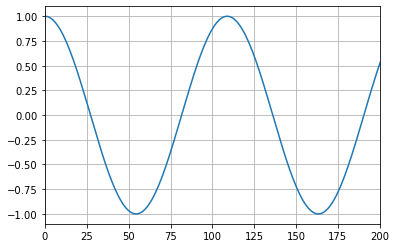

In [10]:
plt.plot(sol.T[0])
plt.xlim(0,200)
plt.grid()

Get time in years and find solution:

In [11]:
# 1) Convert to seconds (SI unit) using equation above
tt = 1/np.sqrt(6.67e-11 * 5.97e24 / (1.5e11)**3 ) 
# 2) Convert from seconds to years
tt = tt / (60*60 * 24* 365.25) * np.diff(t)[0] # per time step (in years)

x1 = sol.T[0]
y1 = sol.T[1]
x2 = sol.T[2]
y2 = sol.T[3]

Make Animation:

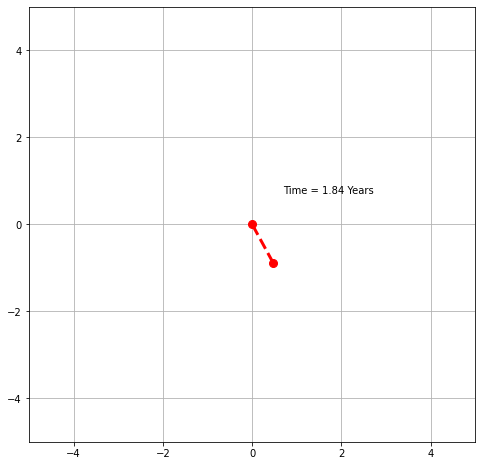

In [13]:
def animate(i):
    ln1.set_data([x1[i], x2[i]], [y1[i], y2[i]])
    text.set_text('Time = {:.2f} Years'.format(i*tt))
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.grid()
ln1, = plt.plot([], [], 'ro--', lw=3, markersize=8)
text = plt.text(0.7, 0.7, '')
ax.set_ylim(-5, 5)
ax.set_xlim(-5,5)
ani = animation.FuncAnimation(fig, animate, frames=200, interval=50)
ani.save('plan.gif',writer='pillow',fps=30) 